In [1]:
import numpy as np
import pandas as pd

In [2]:
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
fontsize = 14

# Loading the data

Let's start by loading the diffusion model parameters :

In [4]:
experimental = pd.read_csv("diffusion-parameters/experimental.csv")
synthetic = pd.read_csv("diffusion-parameters/optimal.csv")

Then let's load the $\alpha_i(t)$ parameters $r_0$ and $m$, and include them to the above dataframes :

In [5]:
experimental["r0"] = pd.read_csv("alpha/experimental.csv")["r0 i"].unique()
experimental["m"] = pd.read_csv("alpha/experimental.csv")["m i"].unique()

In [6]:
synthetic["r0"] = pd.read_csv("alpha/params.csv")["r0 i"].unique()
synthetic["m"] = pd.read_csv("alpha/params.csv")["m i"].unique()

## Combining into a `pd.DataFrame`

Before combining these dataframes, let's rename the plate indexes :

In [7]:
experimental.index = synthetic.index = ("Gal + NaCl", "Glc", "Glc + NaCl", "Gal")

Let's also reorder the environments :

In [8]:
experimental = experimental.loc[["Glc", "Glc + NaCl", "Gal", "Gal + NaCl"]]
synthetic = synthetic.loc[["Glc", "Glc + NaCl", "Gal", "Gal + NaCl"]]

Now let's combine all these parameters into a dataframe :

In [9]:
data = pd.concat((experimental, synthetic), keys = ("experimental", "synthetic"))

# Figure

For consistency reasons with the manuscript's Table 1, let's decide on same order and labels for our figure :

In [10]:
colnames = ("r0", "m", "D", "nu1", "nu2", "K", "kappa")
titles = ("$r_0$", "m", "D", r"$\nu_1$", r"$\nu_2$", "K", r"$\kappa$")

Let's also get the diffusion constants to SI units :

In [11]:
data["D"] = data["D"] * 0.0000403

Now let's create the figure :

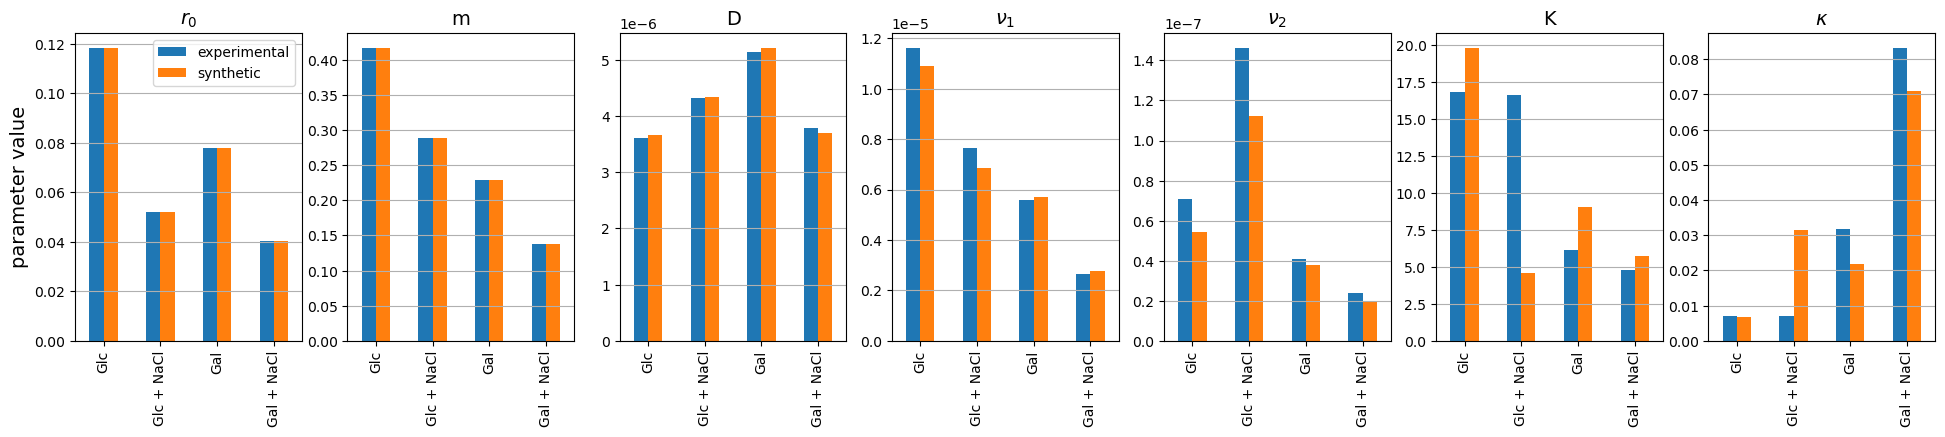

In [12]:
fig, axes = plt.subplots(ncols = 7, figsize = (24, 4))

for col, name, ax in zip(colnames, titles, axes):
    data[col].unstack().T.plot.bar(ax = ax, legend = (col == "r0"))
    ax.set_title(name, fontsize = fontsize)
    ax.grid(axis = "y")
axes[0].set_ylabel("parameter value", fontsize = fontsize)


fig.savefig(f"plots/figure-s4/exp-vs-synth.pdf", bbox_inches = "tight")
fig.savefig(f"plots/figure-s4/exp-vs-synth.png", bbox_inches = "tight");